In [9]:
import torch 
from sklearn.manifold import TSNE
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
embeddingDir = "Embeddings/audio/subURMPClean/train/"
embeddingFiles = os.listdir(embeddingDir)
embeddingFiles.sort()

In [3]:
embeddings = torch.load(f"{embeddingDir}/{embeddingFiles[0]}")
index = np.full((embeddings.shape[0], 1),0)

for i, file in enumerate(embeddingFiles[1:]):
    i += 1
    emb = torch.load(f"{embeddingDir}/{file}")
    idx = np.full((emb.shape[0],1), i)
    
    embeddings = torch.cat([embeddings, emb])
    index = np.concatenate([index, idx])
    
embeddingsTbl = pd.DataFrame(embeddings)
embeddingsTbl['index'] = index
embeddingsNumeric = embeddingsTbl.drop('index', axis=1)


In [84]:
pca = PCA(n_components=3)
pca.fit(embeddingsNumeric)
pcaFeatures = pca.fit_transform(embeddingsNumeric)

In [85]:
pca = PCA(n_components=3)
pca.fit(embeddingsNumeric)
pcaFeatures = pca.fit_transform(embeddingsNumeric)

pcaDF = pd.DataFrame(
    data=pcaFeatures,
    columns=['PC1','PC2','PC3']
)

pcaDF['index'] = index

import plotly.express as px

fig = px.scatter_3d(pcaDF, x="PC1", y="PC2", z="PC3", color="index")



In [4]:
model = TSNE(learning_rate=50)
tsneFeatures = model.fit_transform(embeddingsNumeric)

/Users/richardkyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [10]:
tsneDF = pd.DataFrame(
    data=tsneFeatures,
    columns=['PC1','PC2']
)

tsneDF['index'] = index



In [14]:
tsneDF.iloc[:1999]

,PC1,PC2,index
0,-5.409514,-11.575747,0
1,16.565939,11.736952,0
2,14.205696,9.386175,0
3,-20.277113,11.694847,0
4,-1.098423,-18.151791,0
...,...,...,...
1994,5.103877,0.250649,1
1995,5.748466,0.573970,1
1996,-1.380931,-7.419676,1
1997,17.431211,4.341280,1


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

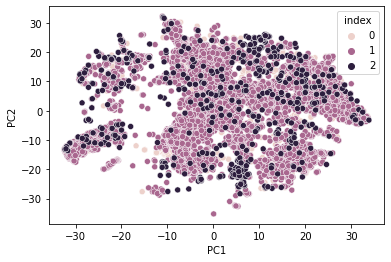

In [17]:
sns.scatterplot(data=tsneDF.iloc[:10000], x='PC1', y='PC2', hue='index')